# Project 02: Orbits of Charged Particles
**Name:** Pranav Advani

# Background and Motivation

**Preliminary Notes**


The "Saturnian" model for a given atom is based solely on classical physics. The "Saturnian" model for the hydrogen atom consists of a single electron orbiting a nucleus consisting of a single proton. The force keeping the electron in a stable orbit is the Coulomb Force: $F_{E} = \frac{kq_1 q_2}{r^2}$. Since the electron is taking a circular path, there must be a centripetal force. Here, the centripetal force is the Coulomb force. The path of an electron in a stable orbit around the nucleus of a hydrogen atom (a single proton), can be modelled by the following equation: 

$$ F_{E} = F_{C} \Rightarrow \frac{kq_1 q_2}{r^2} = \frac{m_{e}v_{e}^2}{r}$$

Where $m_{e}$ is the mass of the electron and $v_{e}$ is the velocity of the electron. The magnitude of the velocity does not change throughout the orbit. There are 2 parameters that can change in the equation above: 
* magnitude of velocity of the electron
* radius of the atom - distance between the nucleus and the electron

Experimentally, the velocity of the electron is dependant on the radius of the atom and vice versa. The velocity of the electron can be found using this following equation: 

$$ v_{e} = \sqrt{\frac{kq_1 q_2}{r m_e}}$$

The radius of the atom can be found using the following formula: 

$$ r = \frac{kq_1 q_2}{m_e v^2}$$

Relying solely on this equation to define a stable orbit is quite difficuly if not impossible analytically. Thus, one may choose to look at the x and y components of the velocity. A fourier transform for velocity would give you the angular momentum of the particle. Since the angular momentum for an elliptical orbit is conserved, the angular momentum is constant. Thus, one can observe how the angular momentum changes with varying positions that velocities. The angular momentum of a system is given by the following equation:

$$L = mvr$$


**Motivation for Investigation**

In this project I will be simulating a helium atom (Helium-3) with 2 electrons, 2 protons, and 1 neutron. The motivation behind simulating Helium-3 is the importnace of looking at systems with 2 electrons where a repulsive force is in play. Creating a stable orbit using the Saturnian model is quite difficult when the repulsive forces are at play. Furthermore, the intended outcome of this project is to sharethe limitations of the Saturnian model and to show that while it is very good at modelling the Hydrogen atom, the Saturnian model fails to sucessfully model atomic systems with more than one electron.


_(Provide some context for the problem and the specific reasearch question(s) you set out to answer. Make sure to discuss why your specific research question(s) would be interesting to investigate. Make sure to explicitly state which parameters you are changing and which paremeters you are keeping fixed. This is also the appropriate place to communicate your governing equations and introduce any additional equations that you might use to check the results of your code. Note: It is helpful for the graders if you are able to embed equations and calculations in the markdown or as images in the notebook instead of as additional files.)_


**Research Question**

In this project, I will be completing the following tasks:

* Creating a stable orbit using the bohr radius for the hydrogen atom and the average speed of an electron
* Randomly varying the initial position of both electrons and testing the stability of the orbit
* Randomly varying the initial velocity of both electrons and testing the stability of the orbit
* Randomly varying the initial position and velocity of both electrons and testing the stability of the orbit. 

Using the random tests, I hope to answer the following research questions that have been inspired from the motivation section of this project:

1. Is there more than one stable orbit?
2. Can the electrons have an initial velocity towards each other while also maintaining a stable orbit?
3. Is it possible to find a stable orbit where there is no symmetry in either initial velocities or initial position

# Methodology and computational code:

The first solve_ivp is for the hydrogen atom and the second is for an electron taking the path of a figure 8 around 2 protons. My end goal is to have the figure 8 being formed around 2 protons moving away from each other and I will make a code to find the point where the protons begin to stop moving.

In [1]:
# STEP 1: Stable He-3 orbit using bohr radius for hydrogen atom and velocity of electron
# Let us define units of measurements:
# distance: meters (m)
# time: seconds (s_
# mass: kilograms (kg)
# 1. Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 2. Define the necessary constants

k = 8.99e9 # Nm^2/C^2

mass_electron = 9.1093837e-31  # kg

m_proton = 1.67262192e-27 # kg

m_neutron = 1.674e-27 # kg

number_of_proton = 2 # number of protons in nucleus

number_of_neutron = 1 # number of neutron in nucleus

mass_nucleus = (m_proton * number_of_proton)+(m_neutron * number_of_neutron)

mmu = mass_electron * 206.7682830

q = 1.60217663e-19 # Coulombs

q_electron = -q

q_nucleus = number_of_proton * q

q_muon = -q

constants = [k, q, mass_electron, m_proton, m_neutron, number_of_proton, number_of_neutron, mass_nucleus, mmu, q_electron, q_nucleus, q_muon]


# 3. Define the Initial Conditions

me1 = mass_electron
x0e1 = 0.529e-10 # m
y0e1 = 0 # m
vx0e1 = 0 # m/s
vy0e1 = 299792458.0/137 # m/s
re0e1 = np.sqrt(x0e1**2 + y0e1**2)

me2 = mass_electron
x0e2 = -0.529e-10 # m
y0e2 = 0 # m
vx0e2 = 0 # m/s
vy0e2 = -299792458.0/137 # m/s
re0e2 = np.sqrt(x0e2**2 + y0e2**2)


state0 = [x0e1, y0e1, vx0e1, vy0e1, x0e2, y0e2, vx0e2, vy0e2]
# state0[0] - initial x-position of electron 1 in meters
# state0[1] - initial y-position of electron 1 in meters
# state0[2] - initial x-velocity of electron 1 in meters/second
# state0[3] - initial y-velocity of electron 1 in meters/second
# state0[4] - initial x-position of electron 2 in meters
# state0[5] - initial y-position of electron 2 in meters
# state0[6] - initial x-velocity of electron 2 in meters/second
# state0[7] - initial y-velocity of electron 2 in meters/second



state_nucleus0 = [0., 0., 0., 0., 'r', mass_nucleus]
# state_nucleus0[0] - initial x-position in meters
# state_nucleus0[1] - initial y-position in meters
# state_nucleus0[2] - initial x-velocity in meters/second
# state_nucleus0[3] - initial y-velocity in meters/second
# state_nucleus0[4] - color of the proton
# state_nucleus0[5] - Mass of the proton in kilograms


# 4. Set times for Solve_ivp
t_start, t_stop = 0, 1.527563400369349e-16 # in seconds
t_span = (t_start, t_stop)
t_eval = np.linspace(t_start, t_stop, 1000000)

rtol=1e-9
atol=1e-9

# 5. Solve_ivp function definition and ODEs

def diff_eqns(t, state, *args):
    xe1, ye1, vxe1, vye1, xe2, ye2, vxe2, vye2 = state
    k, q, mass_electron, m_proton, m_neutron, number_of_proton, number_of_neutron, mass_nucleus, mmu, q_electron, q_nucleus, q_muon = args[0]
    Fex1 = 0
    Fey1 = 0
    Fex2 = 0
    Fey2 = 0
    Fe_e1_e2x = 0
    Fe_e1_e2y = 0
    
    # Finding the distance between the electron 1 and the nucleus
    
    re1 = np.sqrt((xe1 - state_nucleus0[0])**2 + (ye1 - state_nucleus0[1])**2)
    velocity_re1 = np.sqrt(vxe1**2 +vye1**2)
       
    # Force and Acceleration due to the electric force for electron 1
    
    Fex1 = ((k * (q_electron * q_nucleus)) / (re1**2)) * ((xe1) / (re1))
    Fey1 = ((k * (q_electron * q_nucleus)) / (re1**2)) * ((ye1) / (re1))
    
        
    accel_electric_e1_x1 = Fex1/me1
    accel_electric_e1_y1 = Fey1/me1

    # Finding the distance between the electron 2 and the nucleus
    
    re2 = np.sqrt((xe2 - state_nucleus0[0])**2 + (ye2 - state_nucleus0[1])**2)
    velocity_re2 = np.sqrt(vxe2**2 + vye2**2)
       
    # Force and Acceleration due to the electric force for electron 2
    
    Fex2 = ((k * (q_electron * q_nucleus)) / (re2**2)) * ((xe2) / (re2))
    Fey2 = ((k * (q_electron * q_nucleus)) / (re2**2)) * ((ye2) / (re2))

        
    accel_electric_e2_x2 = Fex2/me2
    accel_electric_e2_y2 = Fey2/me2
 
    
    # Finding the distance between electron 1 and electron 2
    
    re1e2 = np.sqrt((state[0] - state[4])**2 + (state[1] - state[5])**2)
    
    # Finding the replulsive force for electron 1
    
    Fe12x = ((k * (q_electron * q_electron)) / (re1e2**2)) * ((xe1) / (re1e2))
    Fe12y = ((k * (q_electron * q_electron)) / (re1e2**2)) * ((ye1) / (re1e2))
        
    accel_electric_e12_x1 = Fe12x/me1
    accel_electric_e12_y1 = Fe12y/me1
    
    # Finding the replulsive force for electron 2
    
    Fe21x = ((k * (q_electron * q_electron)) / (re1e2**2)) * ((xe2) / (re1e2))
    Fe21y = ((k * (q_electron * q_electron)) / (re1e2**2)) * ((ye2) / (re1e2))
        
    accel_electric_e21_x1 = Fe21x/me2
    accel_electric_e21_y1 = Fe21y/me2
    
    # Total acceleration for electron 1
    
    axe1 = accel_electric_e1_x1 + accel_electric_e12_x1
    aye1 = accel_electric_e1_y1 + accel_electric_e12_y1
    
    # Total acceleration for electron 2
    
    axe2 = accel_electric_e2_x2 + accel_electric_e21_x1
    aye2 = accel_electric_e2_y2 + accel_electric_e21_y1
    
        
    state_derivatives =  [vxe1, vye1, axe1, aye1, vxe2, vye2, axe2, aye2]
    return state_derivatives

**Defining a Stable Orbit**

I will be using the angular momentum of the electrons to define a stable orbit. The derivative of angular momentum is torque. Since the torque of an elliptical orbit is 0, the angular momentum is a constant function by conservation of momentum. Thus, finding if the momentum is within a certain threshold (due to simulation error and not having an infinitely small $dt$), we can define that to be a stable orbit. If the agnular momentum decrease or over goes to $0$, that means that the electron is at the nucleus. If the angular momentum is linearly increasing, then that means that the electron has left the orbit and is travelling farther away from the nucleus. 

In [2]:
# Defining a Stable Orbit
import numpy as np
import matplotlib.pyplot as plt


def stable_orbit(state0):
    
    
    solution = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, args=[constants], rtol=1e-9, atol=1e-9, method='RK45')   
    
    times = solution.t
    xe1_soln = solution.y[0]
    ye1_soln = solution.y[1]
    vxe1_soln = solution.y[2]
    vye1_soln = solution.y[3]
    xe2_soln = solution.y[4]
    ye2_soln = solution.y[5]
    vxe2_soln = solution.y[6]
    vye2_soln = solution.y[7]
    
    

    mag_ve1 = np.sqrt(vxe1_soln**2 + vye1_soln**2)
    mag_pos1 = np.sqrt(xe1_soln**2 + ye1_soln**2)
    angve1 = me1*mag_ve1*mag_pos1

    mag_ve2 = np.sqrt(vxe2_soln**2 + vye2_soln**2)
    mag_pos2 = np.sqrt(xe2_soln**2 + ye2_soln**2)
    angve2 = me2*mag_ve2*mag_pos2
    
    if (angve1 >= 0).all() and (angve1 <= 1.3e-34).all() and (angve2 >= 0).all() and (angve2 <= 1.3e-34).all():
        print("the orbit is stable")
        plt.figure(figsize=(17, 10))
        # Position vs. Time graph of the balls
        plt.subplot(3, 2, 1)  # 2 rows, 1 column, select the first subplot
        plt.plot(xe1_soln, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(xe2_soln, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.scatter(0., 0, color='red', label='Nucleus')
        plt.xlabel("x [meters]")
        plt.ylabel("y [meters]")
        plt.title(f"Orbit")
        plt.grid('equal')
        plt.legend(loc='best')

        # Velocity vs. Time graph of the balls
        plt.subplot(3, 2, 2)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, xe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"x-Position of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Acceleration vs. Time graph of the balls
        plt.subplot(3, 2, 3)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"y-Position of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')



        # Kinetic Energy vs. Time graph of the balls
        plt.subplot(3, 2, 4)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vxe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"x - Velocities of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Potential Energy vs. Time graph of the balls
        plt.subplot(3, 2, 5)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"y - Velocities of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')

        plt.subplot(3, 2, 6)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, angve1, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, angve2, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("L [Newton seconds]")
        plt.title(f"Angular Momentum of Electron 1 and 2 vs. Time")
        plt.grid('equal')
        plt.ylim(0, 0.05e-32)
        plt.legend(loc='best')
    
        # Adjust the layout for better spacing
        plt.tight_layout()

        # Show the plots
        plt.show()
    elif (angve1 >= 1.3e-34).any() or (angve2 >= 1.3e-34).any():
        print("the electron is out of orbit")
        
        plt.figure(figsize=(17, 10))
        # Position vs. Time graph of the balls
        plt.subplot(3, 2, 1)  # 2 rows, 1 column, select the first subplot
        plt.plot(xe1_soln, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(xe2_soln, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.scatter(0., 0, color='red', label='Nucleus')
        plt.xlabel("x [meters]")
        plt.ylabel("y [meters]")
        plt.title(f"Orbit")
        plt.grid('equal')
        plt.legend(loc='best')

        # Velocity vs. Time graph of the balls
        plt.subplot(3, 2, 2)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"Position of Electron 1 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Acceleration vs. Time graph of the balls
        plt.subplot(3, 2, 3)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("y [meters]")
        plt.title(f"Position of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')



        # Kinetic Energy vs. Time graph of the balls
        plt.subplot(3, 2, 4)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vxe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 1")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"x - Velocity of Electron 1 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Potential Energy vs. Time graph of the balls
        plt.subplot(3, 2, 5)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vye1_soln, color='blue', linestyle='-', label="electron 2")
        plt.plot(times, vye2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"Velocity of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')

        plt.subplot(3, 2, 6)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, angve1, color='blue', linestyle='-', label="electron 1")
        # plt.plot(times, angve2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("L [Newton seconds]")
        plt.title(f"Angular Momentum of Electron 1 and 2 vs. Time")
        plt.grid('equal')
        # plt.ylim(0, 0.05e-32)
        plt.legend(loc='best')
    
        # Adjust the layout for better spacing
        plt.tight_layout()

        # Show the plots
        plt.show()
    elif (angve1 <= 0).any() or (angve2 <= 0).any():
        print("the electron is in the nucleus")
            
        plt.figure(figsize=(17, 10))
        # Position vs. Time graph of the balls
        plt.subplot(3, 2, 1)  # 2 rows, 1 column, select the first subplot
        plt.plot(xe1_soln, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(xe2_soln, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.scatter(0., 0, color='red', label='Nucleus')
        plt.xlabel("x [meters]")
        plt.ylabel("y [meters]")
        plt.title(f"Orbit")
        plt.grid('equal')
        plt.legend(loc='best')

        # Velocity vs. Time graph of the balls
        plt.subplot(3, 2, 2)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, xe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"x-Position of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Acceleration vs. Time graph of the balls
        plt.subplot(3, 2, 3)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"y-Position of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')



        # Kinetic Energy vs. Time graph of the balls
        plt.subplot(3, 2, 4)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vxe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"x - Velocities of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Potential Energy vs. Time graph of the balls
        plt.subplot(3, 2, 5)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"y - Velocities of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')

        plt.subplot(3, 2, 6)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, angve1, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, angve2, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("L [Newton seconds]")
        plt.title(f"Angular Momentum of Electron 1 and 2 vs. Time")
        plt.grid('equal')
        plt.ylim(0, 0.05e-32)
        plt.legend(loc='best')
    
        # Adjust the layout for better spacing
        plt.tight_layout()

        # Show the plots
        plt.show()
    elif (angve1 >= 1.3e-34).any() or (angve2 >= 1.3e-34).any():
        print("the electron is out of orbit")
        
        plt.figure(figsize=(17, 10))
        # Position vs. Time graph of the balls
        plt.subplot(3, 2, 1)  # 2 rows, 1 column, select the first subplot
        plt.plot(xe1_soln, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(xe2_soln, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.scatter(0., 0, color='red', label='Nucleus')
        plt.xlabel("x [meters]")
        plt.ylabel("y [meters]")
        plt.title(f"Orbit")
        plt.grid('equal')
        plt.legend(loc='best')

        # Velocity vs. Time graph of the balls
        plt.subplot(3, 2, 2)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, xe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"x-Position of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Acceleration vs. Time graph of the balls
        plt.subplot(3, 2, 3)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"y-Position of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')



        # Kinetic Energy vs. Time graph of the balls
        plt.subplot(3, 2, 4)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vxe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"x - Velocities of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Potential Energy vs. Time graph of the balls
        plt.subplot(3, 2, 5)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"y - Velocities of Electrons vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')

        plt.subplot(3, 2, 6)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, angve1, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, angve2, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("L [Newton seconds]")
        plt.title(f"Angular Momentum of Electron 1 and 2 vs. Time")
        plt.grid('equal')
        plt.ylim(0, 0.05e-32)
        plt.legend(loc='best')
    
        # Adjust the layout for better spacing
        plt.tight_layout()

        # Show the plots
        plt.show()
    elif (angve1 >= 1.3e-34).any() or (angve2 >= 1.3e-34).any():
        print("the electron is out of orbit")
        
        plt.figure(figsize=(17, 10))
        # Position vs. Time graph of the balls
        plt.subplot(3, 2, 1)  # 2 rows, 1 column, select the first subplot
        plt.plot(xe1_soln, ye1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(xe2_soln, ye2_soln, color='green', linestyle='-', label="electron 2")
        plt.scatter(0., 0, color='red', label='Nucleus')
        plt.xlabel("x [meters]")
        plt.ylabel("y [meters]")
        plt.title(f"Orbit")
        plt.grid('equal')
        plt.legend(loc='best')

        # Velocity vs. Time graph of the balls
        plt.subplot(3, 2, 2)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.xlabel("t [seconds]")
        plt.ylabel("x [meters]")
        plt.title(f"Position of Electron 1 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Acceleration vs. Time graph of the balls
        plt.subplot(3, 2, 3)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, xe2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("y [meters]")
        plt.title(f"Position of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')



        # Kinetic Energy vs. Time graph of the balls
        plt.subplot(3, 2, 4)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vxe1_soln, color='blue', linestyle='-', label="electron 1")
        plt.plot(times, vxe2_soln, color='green', linestyle='-', label="electron 1")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"x - Velocity of Electron 1 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')


        # Potential Energy vs. Time graph of the balls
        plt.subplot(3, 2, 5)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, vye1_soln, color='blue', linestyle='-', label="electron 2")
        plt.plot(times, vye2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("v [meters/second]")
        plt.title(f"Velocity of Electron 2 vs. Time")
        plt.grid('equal')
        plt.legend(loc='best')

        plt.subplot(3, 2, 6)  # 2 rows, 1 column, select the second subplot
        plt.plot(times, angve1, color='blue', linestyle='-', label="electron 1")
        # plt.plot(times, angve2_soln, color='green', linestyle='-', label="electron 2")
        plt.xlabel("t [seconds]")
        plt.ylabel("L [Newton seconds]")
        plt.title(f"Angular Momentum of Electron 1 and 2 vs. Time")
        plt.grid('equal')
        # plt.ylim(0, 0.05e-32)
        plt.legend(loc='best')
    
        # Adjust the layout for better spacing
        plt.tight_layout()

        # Show the plots
        plt.show()


In [3]:
# Defining a stable orbit function to be used for the phase space diagram
import numpy as np
import matplotlib.pyplot as plt


def stable_orbit2(state0):


    solution = solve_ivp(diff_eqns, t_span, state0, t_eval=t_eval, args=[constants], rtol=1e-9, atol=1e-9, method='RK45')

    times = solution.t
    xe1_soln = solution.y[0]
    ye1_soln = solution.y[1]
    vxe1_soln = solution.y[2]
    vye1_soln = solution.y[3]
    xe2_soln = solution.y[4]
    ye2_soln = solution.y[5]
    vxe2_soln = solution.y[6]
    vye2_soln = solution.y[7]

    mag_ve1 = np.sqrt(vxe1_soln**2 + vye1_soln**2)
    mag_pos1 = np.sqrt(xe1_soln**2 + ye1_soln**2)
    angve1 = me1*mag_ve1*mag_pos1

    mag_ve2 = np.sqrt(vxe2_soln**2 + vye2_soln**2)
    mag_pos2 = np.sqrt(xe2_soln**2 + ye2_soln**2)
    angve2 = me2*mag_ve2*mag_pos2

    if (angve1 >= 0).all() and (angve1 <= 1.3e-34).all() and (angve2 >= 0).all() and (angve2 <= 1.3e-34).all():
        return "stable"

    elif (angve1 >= 1.3e-34).any() or (angve2 >= 1.3e-34).any():
        return "nsi"

    elif (angve1 <= 0).any() or (angve2 <= 0).any():
        return "nso"



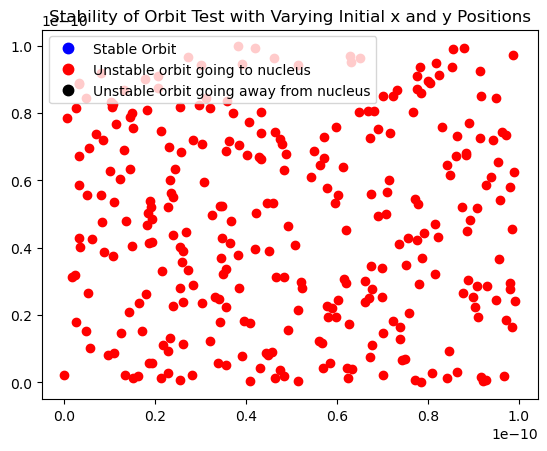

In [4]:
# Phase space diagram with varying the initial x and y position of the electrons

# 1.import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# 2. Make an array of x-values you want to cycle through

x_values_array_e1 = np.random.rand(300)*1e-10

y_values_array_e1 = np.random.rand(300)*1e-10

x_values_array_e2 = np.random.rand(300)*1e-10

y_values_array_e2 = np.random.rand(300)*1e-10

for x in range (len(x_values_array_e1)):

    stateo = [x_values_array_e1[x], y_values_array_e1[x], 0, 299792458.0/137, x_values_array_e2[x], y_values_array_e2[x], 0, 299792458.0/137]
    stability = stable_orbit2(stateo)
    
    
    if stability == "stable":
        print(x_values_array_e1[x], y_values_array_e1[x], x_values_array_e2[x], y_values_array_e2[x])
        plt.scatter(x_values_array_e1[x],y_values_array_e1[x],c="b")
        
        
    if stability == "nsi":
         plt.scatter(x_values_array_e1[x],y_values_array_e1[x],c="r")
            
            
    if stability == "nso":
        plt.scatter(x_values_array_e1[x],y_values_array_e1[x],c="k")
        
stablee = mlines.Line2D([], [], color='blue', marker='.', linestyle='None', markersize=15, label='Stable Orbit')

unstable_nuc = mlines.Line2D([], [], color='red', marker='.', linestyle='None', markersize=15, label='Unstable orbit going to nucleus')

unstable_off = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=15, label='Unstable orbit going away from nucleus')

plt.title("Stability of Orbit Test with Varying Initial x and y Positions")

plt.legend(handles=[stablee, unstable_nuc, unstable_off], loc='best')
plt.show()



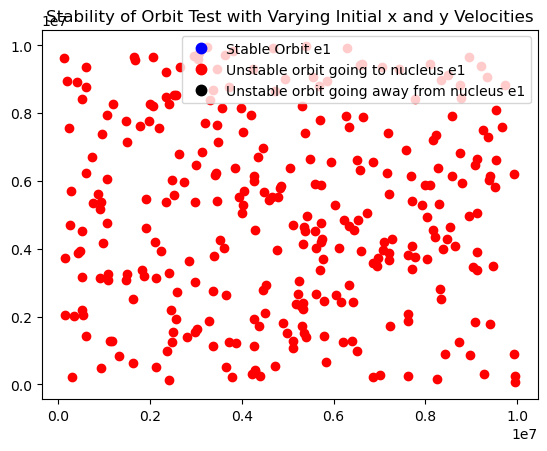

In [5]:
# 1.import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# 2. Make an array of x-values you want to cycle through

vx_values_array_e1 = np.random.rand(300)*1e7

vy_values_array_e1 = np.random.rand(300)*1e7

vx_values_array_e2 = np.random.rand(300)*1e7

vy_values_array_e2 = np.random.rand(300)*1e7

for x in range (len(vx_values_array_e1)):

    stateo = [0.529e-10 , 0, vx_values_array_e1[x], vy_values_array_e1[x], -0.529e-10 , 0, vx_values_array_e2[x], vy_values_array_e2[x]]
    stability = stable_orbit2(stateo)
    
    
    if stability == "stable":
        print(vx_values_array_e1[x], vy_values_array_e1[x], vx_values_array_e1[x], vy_values_array_e1[x])
        plt.scatter(vx_values_array_e1[x],vy_values_array_e1[x],c="b")

        
    if stability == "nsi":
        plt.scatter(vx_values_array_e1[x],vy_values_array_e1[x],c="r")

            
    if stability == "nso":
        plt.scatter(vx_values_array_e1[x],vy_values_array_e1[x],c="k")

        
        
stablee = mlines.Line2D([], [], color='blue', marker='.', linestyle='None', markersize=15, label='Stable Orbit e1')

unstable_nuc = mlines.Line2D([], [], color='red', marker='.', linestyle='None', markersize=15, label='Unstable orbit going to nucleus e1')

unstable_off = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=15, label='Unstable orbit going away from nucleus e1')

plt.title("Stability of Orbit Test with Varying Initial x and y Velocities")

plt.legend(handles=[stablee, unstable_nuc, unstable_off])
plt.show()

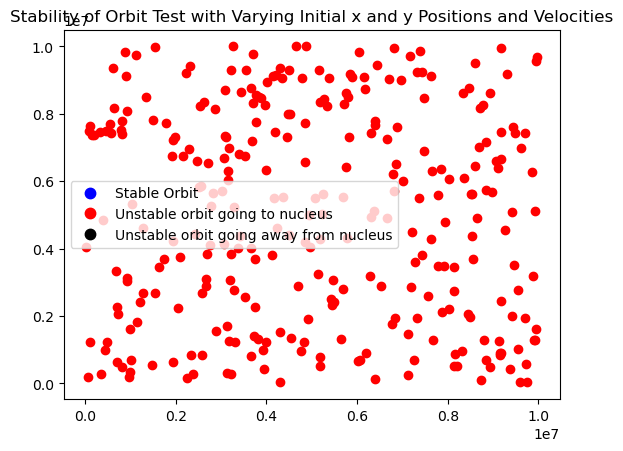

In [6]:
# 1.import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# 2. Make an array of x-values you want to cycle through

x_values_array_e1 = np.random.rand(300)*1e-10

y_values_array_e1 = np.random.rand(300)*1e-10

x_values_array_e2 = np.random.rand(300)*1e-10

y_values_array_e2 = np.random.rand(300)*1e-10

vx_values_array_e1 = np.random.rand(300)*1e7

vy_values_array_e1 = np.random.rand(300)*1e7

vx_values_array_e2 = np.random.rand(300)*1e7

vy_values_array_e2 = np.random.rand(300)*1e7

for x in range (len(vx_values_array_e1)):

    stateo = [x_values_array_e1[x] , y_values_array_e1[x], vx_values_array_e1[x], vy_values_array_e1[x], x_values_array_e2[x] , y_values_array_e2[x], vx_values_array_e2[x], vy_values_array_e2[x]]
    stability = stable_orbit2(stateo)
    
    
    if stability == "stable":
        print(x_values_array_e1[x], y_values_array_e1[x], vx_values_array_e1[x], vy_values_array_e1[x], x_values_array_e2[x], y_values_array_e2[x], vx_values_array_e2[x], vy_values_array_e2[x])
        plt.scatter(vx_values_array_e1[x],vy_values_array_e1[x],c="b")#, label="stable")
    if stability == "nsi":
         plt.scatter(vx_values_array_e1[x],vy_values_array_e1[x],c="r")#, label="unstable in")
    if stability == "nso":
        plt.scatter(vx_values_array_e1[x],vy_values_array_e1[x],c="k")#, label="unstable out")
        
        
        
stablee = mlines.Line2D([], [], color='blue', marker='.', linestyle='None', markersize=15, label='Stable Orbit')

unstable_nuc = mlines.Line2D([], [], color='red', marker='.', linestyle='None', markersize=15, label='Unstable orbit going to nucleus')

unstable_off = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=15, label='Unstable orbit going away from nucleus')

plt.title("Stability of Orbit Test with Varying Initial x and y Positions and Velocities")

plt.legend(handles=[stablee, unstable_nuc, unstable_off])
plt.show()

# Error testing

**Test 1.** I will calculate the bohr radius of the hydrogen atom using only the average velocity of an electron. I will then confirm that my bohr radius is correct by running the simulation with the values I find showing a stable orbit and I will also compare the values of the bohr radius found using my calculation with the actual value. This is a good way to check if my code is working properely because I use the bohr radius of the atom and the average speed of the electron to get a stable orbit. 

The average velocity of an electron in an atom is:

$$v_{e^-} = \frac{c}{137} = \frac{3\times 10^{8}}{137} = 2189781.0219 \frac{m}{s}$$ where $c$ is the speed of light. This speed is from Wikipedia.

We can use the following equation to calculate the bohr radius. 

$$ F_{E} = F_{C} \Rightarrow \frac{kq_1 q_2}{r^2} = \frac{m_{e}v_{e}^2}{r}$$

$$\frac{kq_1 q_2}{r^2} = \frac{m_{e}v_{e}^2}{r}$$. We can now rearrange this equation to solve for the radius

$$r = \frac{kq_1 q_2}{m_{e}v_{e}^2}$$

Now we can plug in the values to check:

$$r = \frac{(9\times 10^9)(1.602\times 10^{-19}) (-1.602\times 10^{-19})}{(9.109 \times 10^{-31})(2189781.0219)^2}$$. Since the value of this will be negative, we must take the absolulte value because the radius can never be negative.

$$r = |\frac{(9\times 10^9)(1.602\times 10^{-19}) (-1.602\times 10^{-19})}{(9.109 \times 10^{-31})(2189781.0219)^2}| = 5.288 \times 10^{-11} = 5.29 \times 10^{-11}$$. 

The Bohr radius of the hydrogen atom from text is: 

$$r_{Bohr} = 5.29 \times 10^{-11}$$ according to Wikipedia. 

This shows that my by-hand calculation matches the actual value of the Bohr Radius. Now we will check whether the orbit using the Bohr radius and the average velocity of an electron creates a stable orbit. 







the orbit is stable


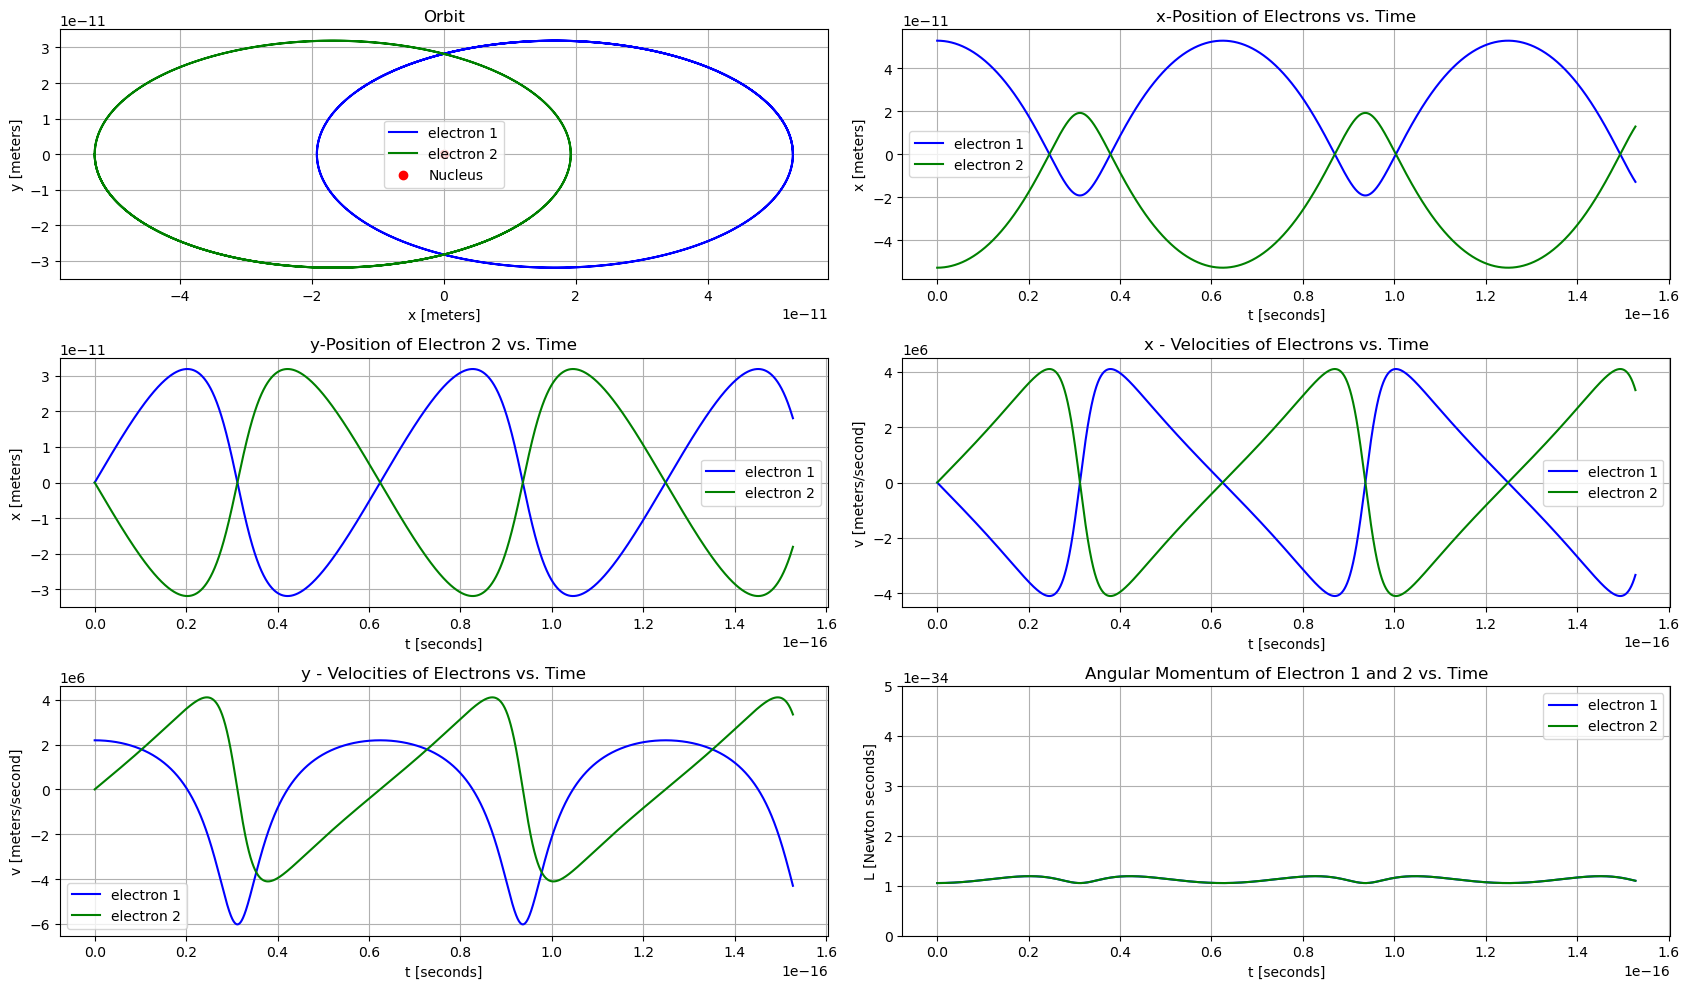

In [7]:
# Your error checking code, function calls and plotting code. Add more code cells as needed.
stable_orbit([0.529e-10, 0, 0, 299792458.0/137, -0.529e-10, 0, 0, -299792458.0/137])

As we can see, using the Bohr Radius gives us a stable orbit and it matches the actual value. 

**Test 2** Now since I am using angular momentum as a means to defina stable orbit, I will use a by-hand calculation to check whether the angular momentum of the simulation is similar to the by-hand calculation. I will be using the same, Bohr radius and average velocity of the electron found in order to check my values. 

We can use the following equation:

$$L = m_evr$$

Now, we can plug in the values we have to solve for angular momentum

$$L = (9.109\times10^{-31})(2189781.0219)(5.29 \times 10^{-11}) = 1.0547926 \times 10^{-34}$$. As we can see in the plot above, the angular momentum is a little over $1\times 10^{-34}$.This shows that we did this calculation correctly and this is a valid way to check for stability of the orbit. Furthermore, the reason why, in the plot above, the angular momentum is not constant is because there is a certain error with our calculation. This is due to the fact that we only have a finite time step. 

# Data visualization, interpretation and presentation of results

### Plot of Orbit using Bohr Radius of the atom and Electron Velocity

the orbit is stable


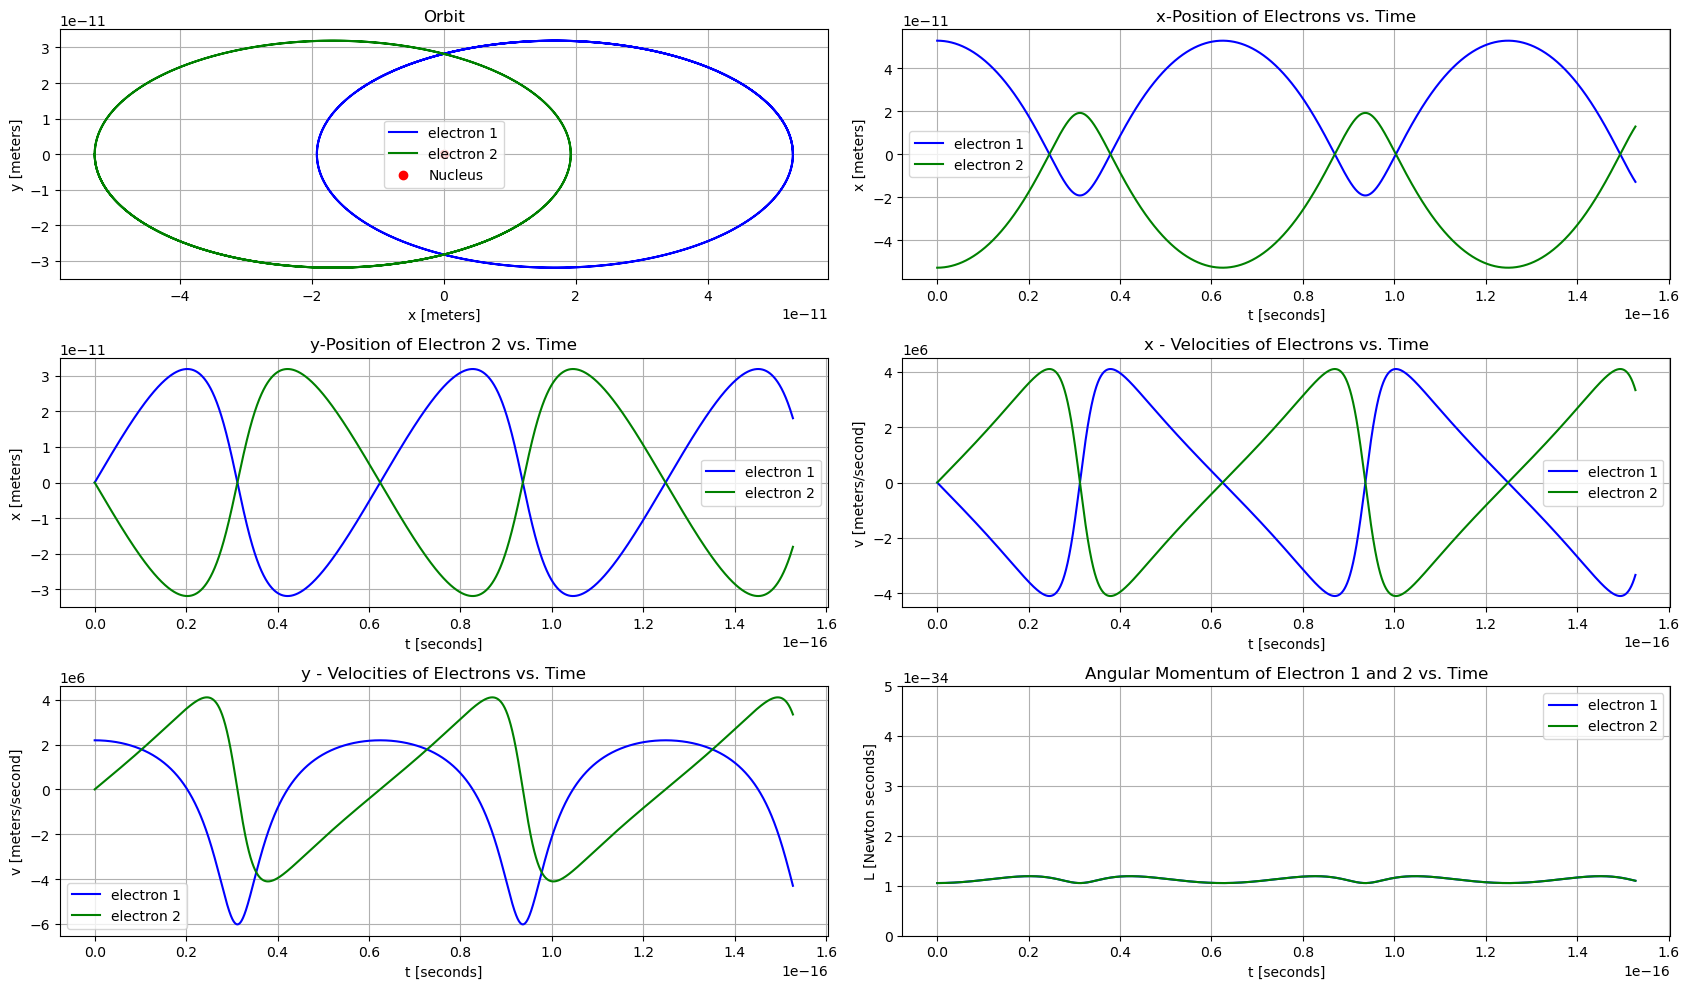

In [8]:
# Plotting and other code that presents results. Add more code cells as needed.
stable_orbit([0.529e-10, 0, 0, 299792458.0/137, -0.529e-10, 0, 0, -299792458.0/137])

Plot of He-3 with a stable orbit. The electrons are positioned and equal distance (Bohr Radius) away from the nucleus. The initial velocity of the electrons are both equal to the average velocity of an electron in the hydrogen atom. The initial velocities of the electrons are set such that they are opposite in direction. The first plot (top left) is a plot of the stable orbit. The second and the third plot (top right and middle left) are plots of both electrons x and y position over time. The fourth and fifth plot (middle right and bottom left) are plots of the x and y velocities of both electrons over time. The final plot (bottom left) is the plot of angular momentum that is used to demonstrate whether the orbit is stable or not. 

the electron is out of orbit


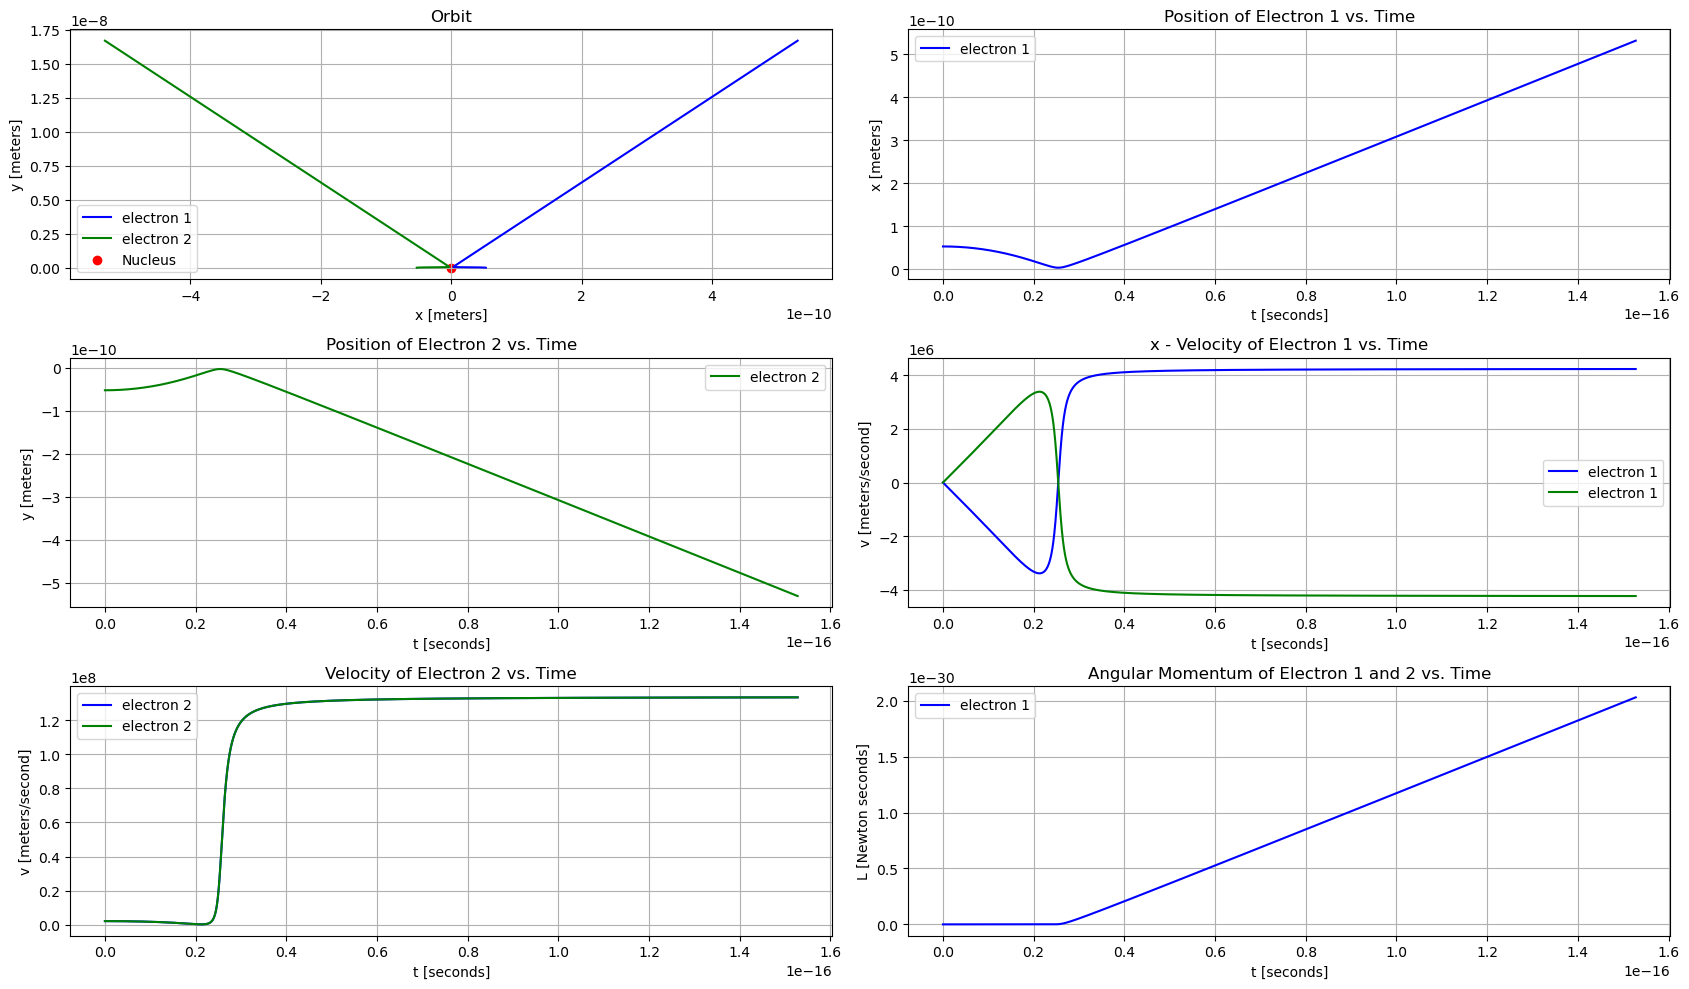

In [9]:
stable_orbit([0.529e-10, 0, 0, 299792458.0/137, -0.529e-10, 0, 0, 299792458.0/137])

Plot of He-3 with an unstable orbit. The electrons are positioned and equal distance (Bohr Radius) away from the nucleus. The initial velocity of the electrons are both equal to the average velocity of an electron in the hydrogen atom. The initial velocities of the electrons are set such that they are in the same direction. The first plot (top left) is a plot of the unstable orbit. The second and the third plot (top right and middle left) are plots of both electrons x and y position over time. The fourth and fifth plot (middle right and bottom left) are plots of the x and y velocities of both electrons over time. The final plot (bottom left) is the plot of angular momentum that is used to demonstrate that the orbit is unstable. As we can see from the first plot, the orbit is unstable and when the 2 electrons get too close to each other, they repel and leave the orbit. The angular momentum graph shows that at the point where the electrons meet, the angular momentum increases lineaerly as the electrons distance from the nucleus increase. 

### Plot of Orbit With X and Y Positions Varied using Phase Space Diagram

the orbit is stable


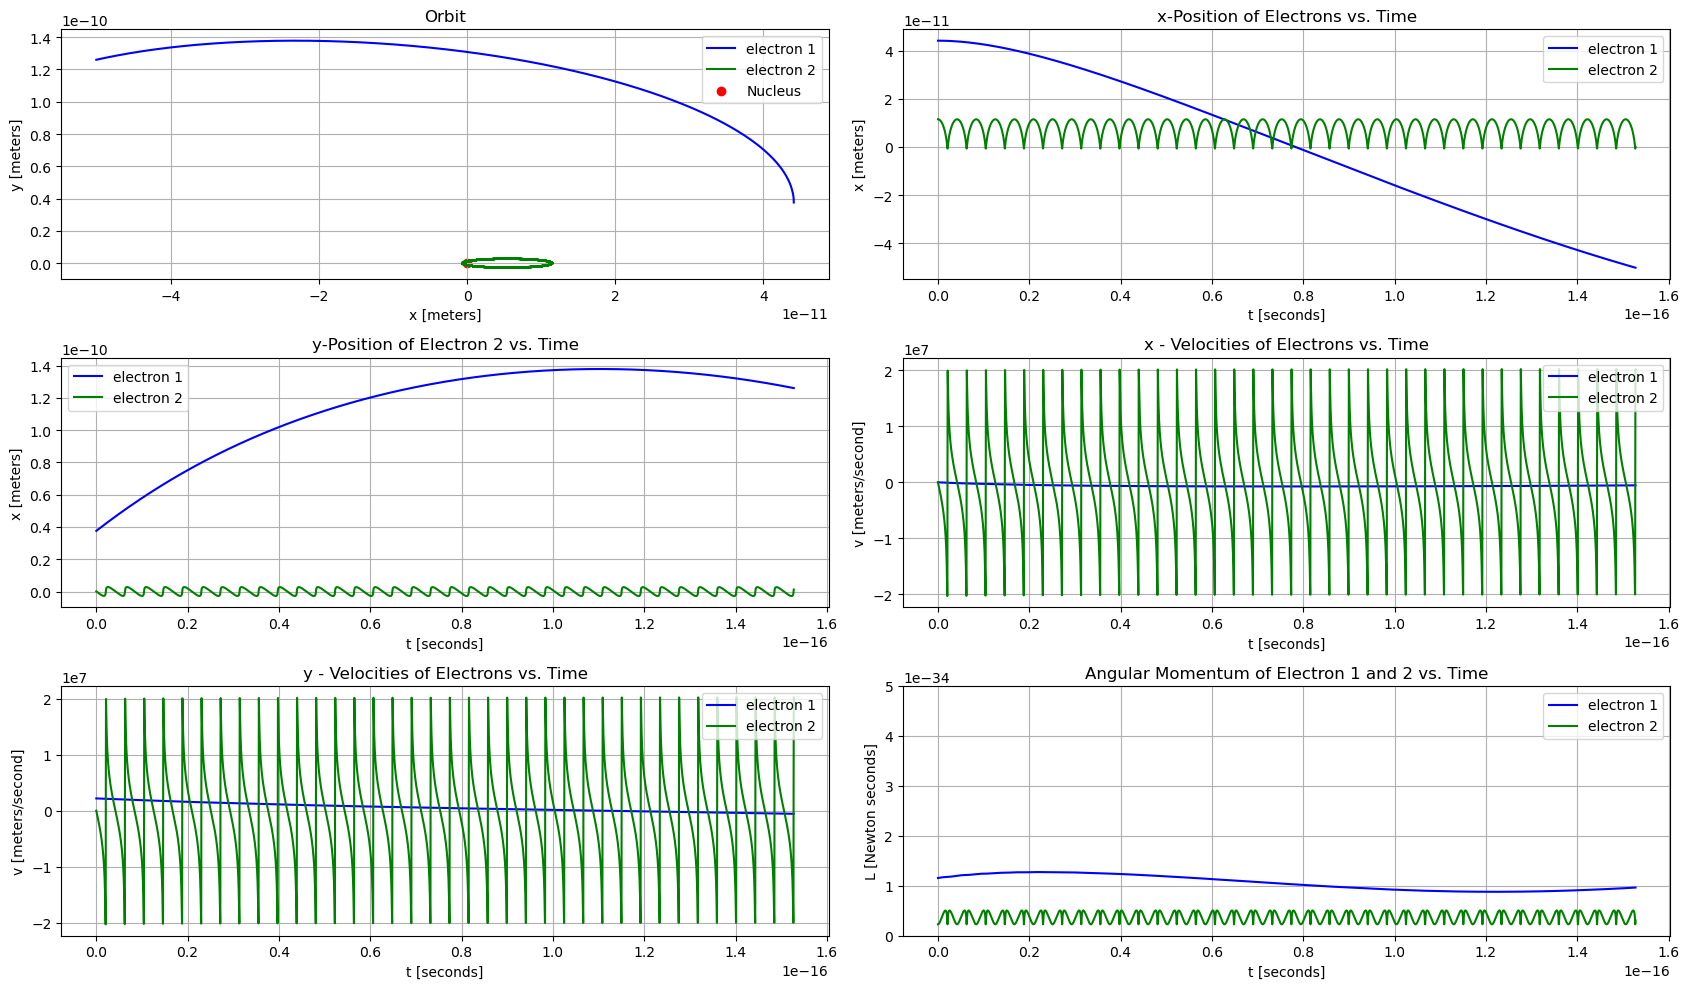

In [10]:
stable_orbit([4.4122702905583545e-11, 3.7587803373339705e-11, 0, 299792458.0/137, 1.1489221353833756e-11,  1.185354063962585e-13, 0, -299792458.0/137])

Plot of He-3 with a stable orbit. The electrons are positioned and equal distance (Bohr Radius) away from the nucleus. The initial velocities of the electrons are set such that they are opposite in direction. The initial positions have been determined using the phase space diagram. The first plot (top left) is a plot of the stable orbit. The second and the third plot (top right and middle left) are plots of both electrons x and y position over time. The fourth and fifth plot (middle right and bottom left) are plots of the x and y velocities of both electrons over time. The final plot (bottom left) is the plot of angular momentum that is used to demonstrate whether the orbit is stable or not. As we can see, the velocities of the electrons are in the same direction, however, the elctron repulsion does not prevent a stable orbit. The angular momentum graph shows that the electrons have a stable orbit since is it relatively linear. 

### Plot of Orbit With X and Y Velocities Varied using Phase Space Diagram

the orbit is stable


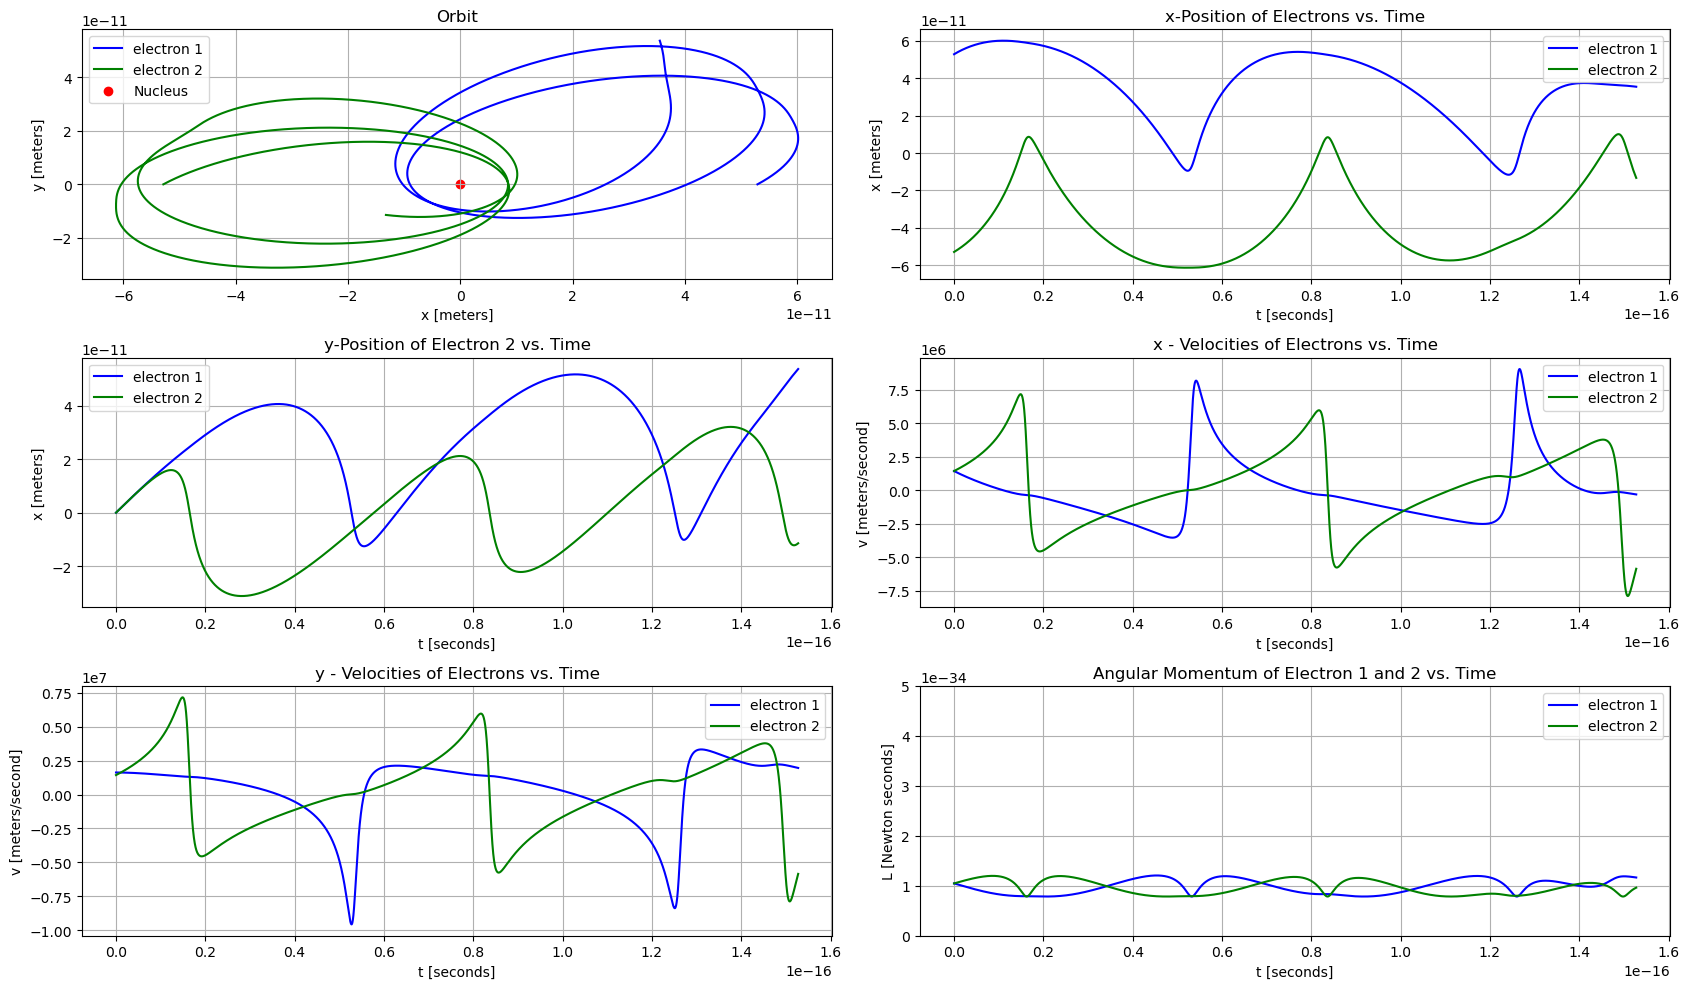

In [11]:
stable_orbit([0.529e-10, 0, 1438754.5288101933, 1628697.5349723643, -0.529e-10, 0, 1438754.5288101933, 1628697.5349723643])

Plot of He-3 with a stable orbit. The electrons are positioned and equal distance (Bohr Radius) away from the nucleus. The velocities of the electrons are equal and in the same direction. The velocities have been dtermined using the phase space diagram. The first plot (top left) is a plot of the stable orbit. The second and the third plot (top right and middle left) are plots of both electrons x and y position over time. The fourth and fifth plot (middle right and bottom left) are plots of the x and y velocities of both electrons over time. The final plot (bottom left) is the plot of angular momentum that is used to demonstrate whether the orbit is stable or not. As we can see, the velocities of the electrons are in the same direction, however, the elctron repulsion does not prevent a stable orbit. The angular momentum graph shows that the electrons have a stable orbit since is it relatively linear.

### Plot of Orbit With X and Y Positions and Velocities Varied using Phase Space Diagram

I was unable to find a stable orbit using this method even after running the cell 10 times over. I will discuss the implicaitons of this in the synthesis and discussion section. 

# Synthesis and discussion

In this project I:
* Created a stable orbit using the bohr radius for the hydrogen atom and the average speed of an electron
* Randomly varied the initial position of both electrons and tested the stability of the orbit
* Randomly varied the initial velocity of both electrons and tested the stability of the orbit
* Randomly varied the initial position and velocity of both electrons and tested the stability of the orbit.

The **Research Questions** asked at the beginning of this project were: 

1. Is there more than one stable orbit?
2. Can the electrons have an initial velocity towards each other while also maintaining a stable orbit?
3. Is it possible to find a stable orbit where there is no symmetry in either initial velocities or initial position

**General Thoughts on the Analysis of the Data**

I will now talk about my general thoughts on the outcome of this project. I will then usebthis general output to answer the questions, reinstated above, and I will conclude with what we can take from the simulations ran. 

Using the Bohr radius for the hydrogen atom and the average velocity of the electron, it is possible to find a stable orbit for the 2 electrons only if the electron have an initial velocity in opposite directions. Furthermore, the second plot of the Data Visualisation section shows a plot of 2 electrons travelling towards each other with an initial velocity set to that of an electron and the initial position set to be the Bohr radius. This plot shows that the electrons go close to each other and the repulsive electric force forced the electrons out of orbit causing the angular momentum to increase linearly. Furthermore, using the phase space diagrams with randomly generated varying positions and velocity give more unstable orbits rather than stable orbits. Even with 200 tests, run multiple times to test different values, the phase space diagram shows the difficulties in finding a stable orbit with the repulsive forces of the electrons.e


**Answers Found to the Research Questions**

1. Before I answer this question, I must define, once again, what a stable orbit is. A stable orbit is defined to be an orbit where the angular momentum is relatively constant and does not change drastically at any point in the orbit. Therefore, yes there is more than one stable orbit. I was able to find another stable orbit using the phase space diagrams where I varied the initial velocities of both particles. 

2. Yes they can. The stable orbit found with the phase space diagram that varied the initial velocities found a stable orbit where the intitial velocities of the electrons were towards each other

3. From this project, there was no initial state found where symmetry in initial position or inital velocity was not present. This question would require a deeper study of all possible initial states which would require a significantly greater number of phase space tests which includes both randomly generated initial states and systematically varied intial states. 

**General Conclusion and Applications of This Project**

In conclusion, the Saturnian model for the atom is limited to the hydrogen atom. While the Saturnian model is a great tool to simulate variations of the hydrogen atom, which is a system consisting of a single proton and electron, the Saturnian model fails when simulating a system with more than 1 proton or electron. One assumption that need to be made for this simulation is that the 2 protons in the nuclei do not repel each other. Had this assumption not been made, the He-3 atom would break into multiple unstable particles. This is one of the many limitations of the Saturnian model. Another limitation of the Saturnian model is that for a system of more than one electron, the electron repulsion makes the atom such that having multiple stable orbits is slim to none. For an atom with more that 10 electrons, it may be impossible to find a stable orbit using only the Saturnian model. A more sophisticated model will be needed to accurately represent the movement of electrons in an atom. 

A few applications of this project include:
* testing how close 2 electrons can get to each other, before repelling, at varying speeds.
    * testing whether it is possible to send 2 electrons fast enough that they pass each other and continue to move in a stable orbit.
* Seeing how angular momentum changes as an electron approaches, but never reaches, the nucleus. 
* Further testing of the limitations of the Saturnian Model. 

These applications are characteristics of the Saturnian model I would like to test given the time to continue working on this project. 